### Business Problem
#### Heart disease is one of the leading causes of mortality worldwide.The objective is to identify high-risk patterns to support preventive healthcare decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\AyushriK\Downloads\archive (6)\heart_attack_china.csv")

In [3]:
pd.set_option('display.max_column', 28)

In [4]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,Diet_Score,Stress_Level,Alcohol_Consumption,Family_History_CVD,Healthcare_Access,Rural_or_Urban,Region,Province,Hospital_Availability,TCM_Use,Employment_Status,Education_Level,Income_Level,Blood_Pressure,Chronic_Kidney_Disease,Previous_Heart_Attack,CVD_Risk_Score,Heart_Attack
0,1,55,Male,Non-Smoker,No,No,Yes,Normal,High,High,Moderate,Low,Yes,No,Good,Rural,Eastern,Beijing,Low,Yes,Unemployed,Primary,Low,104,Yes,No,78,No
1,2,66,Female,Smoker,Yes,No,No,Low,Medium,High,Healthy,Medium,No,Yes,Poor,Urban,Eastern,Qinghai,High,No,Unemployed,Secondary,Middle,142,No,No,49,No
2,3,69,Female,Smoker,No,No,No,Low,Medium,High,Moderate,Low,No,No,Poor,Rural,Eastern,Henan,Low,No,Unemployed,Primary,High,176,No,No,31,No
3,4,45,Female,Smoker,No,Yes,No,Normal,Medium,Low,Healthy,Medium,Yes,No,Poor,Rural,Central,Qinghai,Medium,Yes,Employed,Primary,Low,178,No,Yes,23,No
4,5,39,Female,Smoker,No,No,No,Normal,Medium,Medium,Healthy,Low,No,No,Moderate,Urban,Western,Guangdong,Low,No,Retired,Higher,Middle,146,Yes,No,79,No


In [5]:
df.shape

(239266, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239266 entries, 0 to 239265
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Patient_ID              239266 non-null  int64 
 1   Age                     239266 non-null  int64 
 2   Gender                  239266 non-null  object
 3   Smoking_Status          239266 non-null  object
 4   Hypertension            239266 non-null  object
 5   Diabetes                239266 non-null  object
 6   Obesity                 239266 non-null  object
 7   Cholesterol_Level       239266 non-null  object
 8   Air_Pollution_Exposure  239266 non-null  object
 9   Physical_Activity       239266 non-null  object
 10  Diet_Score              239266 non-null  object
 11  Stress_Level            239266 non-null  object
 12  Alcohol_Consumption     239266 non-null  object
 13  Family_History_CVD      239266 non-null  object
 14  Healthcare_Access       239266 non-n

In [7]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Smoking_Status                0
Hypertension                  0
Diabetes                      0
Obesity                       0
Cholesterol_Level             0
Air_Pollution_Exposure        0
Physical_Activity             0
Diet_Score                    0
Stress_Level                  0
Alcohol_Consumption           0
Family_History_CVD            0
Healthcare_Access             0
Rural_or_Urban                0
Region                        0
Province                      0
Hospital_Availability         0
TCM_Use                       0
Employment_Status             0
Education_Level           59617
Income_Level                  0
Blood_Pressure                0
Chronic_Kidney_Disease        0
Previous_Heart_Attack         0
CVD_Risk_Score                0
Heart_Attack                  0
dtype: int64

In [8]:
(df.isnull().sum()/len(df))*100

Patient_ID                 0.00000
Age                        0.00000
Gender                     0.00000
Smoking_Status             0.00000
Hypertension               0.00000
Diabetes                   0.00000
Obesity                    0.00000
Cholesterol_Level          0.00000
Air_Pollution_Exposure     0.00000
Physical_Activity          0.00000
Diet_Score                 0.00000
Stress_Level               0.00000
Alcohol_Consumption        0.00000
Family_History_CVD         0.00000
Healthcare_Access          0.00000
Rural_or_Urban             0.00000
Region                     0.00000
Province                   0.00000
Hospital_Availability      0.00000
TCM_Use                    0.00000
Employment_Status          0.00000
Education_Level           24.91662
Income_Level               0.00000
Blood_Pressure             0.00000
Chronic_Kidney_Disease     0.00000
Previous_Heart_Attack      0.00000
CVD_Risk_Score             0.00000
Heart_Attack               0.00000
dtype: float64

In [9]:
df['Education_Level'] = df['Education_Level'].fillna('Unknown')

In [10]:
df['Education_Level'].value_counts()

Education_Level
Higher       59942
Primary      59901
Secondary    59806
Unknown      59617
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

### Duplicate Records Check
- No duplicate rows found in the dataset.
- Each Patient_ID is unique, ensuring reliable patient-level analysis.


In [13]:
df.dtypes

Patient_ID                 int64
Age                        int64
Gender                    object
Smoking_Status            object
Hypertension              object
Diabetes                  object
Obesity                   object
Cholesterol_Level         object
Air_Pollution_Exposure    object
Physical_Activity         object
Diet_Score                object
Stress_Level              object
Alcohol_Consumption       object
Family_History_CVD        object
Healthcare_Access         object
Rural_or_Urban            object
Region                    object
Province                  object
Hospital_Availability     object
TCM_Use                   object
Employment_Status         object
Education_Level           object
Income_Level              object
Blood_Pressure             int64
Chronic_Kidney_Disease    object
Previous_Heart_Attack     object
CVD_Risk_Score             int64
Heart_Attack              object
dtype: object

- Many ordinal and categorical medical features were stored as object types, requiring type handling before statistical analysis.
- Numerical variables were retained, nominal categorical variables were kept as categories, and ordinal features were identified for ordered analysis.
- Education_Level is an ordinal variable with levels Primary, Secondary, and Higher; the ‘Unknown’ category represents missing information.

In [15]:
df['Education_Level'].unique()

array(['Primary', 'Secondary', 'Higher', 'Unknown'], dtype=object)

In [16]:
df['Education_Level'] = df['Education_Level'].replace('Unknown', np.nan)

In [17]:
df['Education_Level'].isna().sum()

59617

- Given the moderate proportion of missing education data, values were retained as missing during EDA to avoid bias.

In [19]:
df['Education_Level'].unique()

array(['Primary', 'Secondary', 'Higher', nan], dtype=object)

In [20]:
df['Diet_Score'].unique()

array(['Moderate', 'Healthy', 'Poor'], dtype=object)

In [21]:
df['Income_Level'].unique()

array(['Low', 'Middle', 'High'], dtype=object)

In [22]:
df['Stress_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [23]:
df['Physical_Activity'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [24]:
df['Air_Pollution_Exposure'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [25]:
df['Healthcare_Access'].unique()

array(['Good', 'Poor', 'Moderate'], dtype=object)

In [26]:
df['Cholesterol_Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

- Ordinal variables were identified and their logical order was defined based on domain knowledge.

In [28]:
## Univariate Analysis

In [29]:
df[['Age', 'Blood_Pressure', 'CVD_Risk_Score']].describe()

,Age,Blood_Pressure,CVD_Risk_Score
count,239266.000000,239266.000000,239266.000000
mean,59.466284,134.513378,54.485581
std,17.348308,25.991827,25.987743
min,30.000000,90.000000,10.000000
25%,44.000000,112.000000,32.000000
50%,59.000000,135.000000,54.000000
75%,75.000000,157.000000,77.000000
max,89.000000,179.000000,99.000000


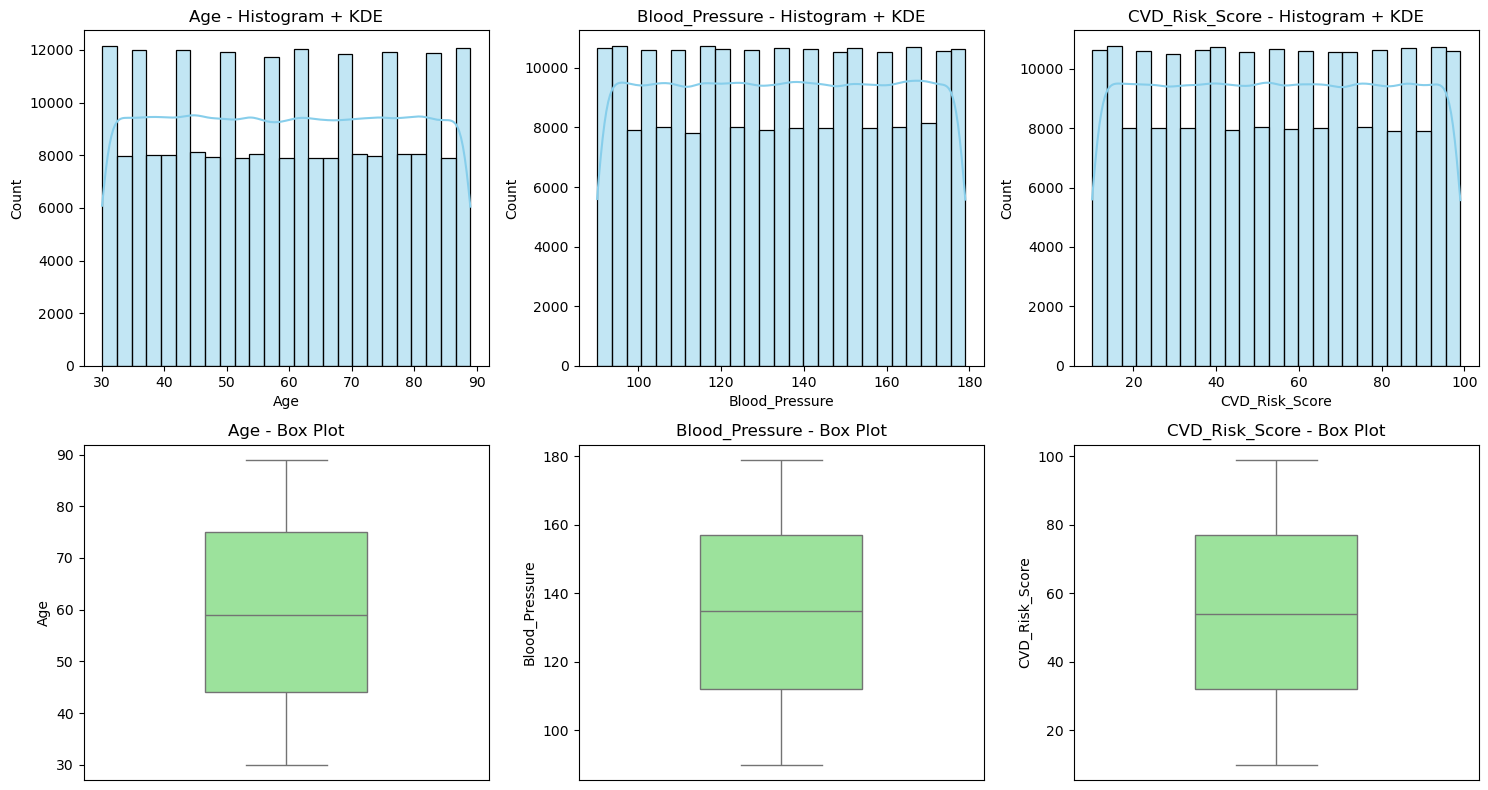

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
# ------------------ Row 1: Histogram + KDE ------------------
for i, col in enumerate(['Age', 'Blood_Pressure', 'CVD_Risk_Score']):
    sns.histplot(data=df, x=col, kde=True, ax=axes[0, i], color='skyblue', bins=25)
    axes[0, i].set_title(f'{col} - Histogram + KDE')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Count')
# ------------------ Row 2: Boxplot ------------------
for i, col in enumerate(['Age', 'Blood_Pressure', 'CVD_Risk_Score']):
    sns.boxplot(data=df, y=col, ax=axes[1, i], color='lightgreen', width=0.4)
    axes[1, i].set_title(f'{col} - Box Plot')
    axes[1, i].set_ylabel(col)
    axes[1, i].set_xticks([])   # x-axis ko clean kar diya

plt.tight_layout()
plt.show()

#### The age distribution appears approximately uniform across the defined range. Although minor fluctuations are visible in the KDE curve, the histogram does not indicate distinct modes. These variations are likely smoothing artifacts rather than evidence of bimodality.

### EDA Note (Age):
- Age shows a symmetric distribution with no significant outliers, indicating a well-spread and clean numerical variable.
### EDA Note (Blood Pressure):
- Blood pressure values exhibit a wide and symmetric spread with no visible outliers, supporting the uniform distribution observed earlier.
### EDA Note (CVD Risk Score):
- CVD risk score demonstrates a well-distributed range with no extreme outliers, confirming statistical and visual consistency.

### category Nominal (No natural order)

Gender
Smoking_Status
Hypertension
Diabetes
Obesity
Family_History_CVD
TCM_Use
Chronic_Kidney_Disease
Previous_Heart_Attack
Heart_Attack
Rural_or_Urban
Region
Province
Employment_Status
### Ordinal
Education_Level        (Primary < Secondary < Higher)
Income_Level           (Low < Middle < High)
Diet_Score             (Poor < Moderate < Healthy)
Stress_Level           (Low < Medium < High)
Physical_Activity      (Low < Medium < High)
Air_Pollution_Exposure (Low < Medium < High)
Healthcare_Access      (Poor < Moderate < Good)
Hospital_Availability  (Low < Medium < High)
Cholesterol_Level      (Low < Normal < High)
Alcohol_Consumption    (Low < Medium < High)


In [34]:
df.describe(include=['object'])

,Gender,Smoking_Status,Hypertension,Diabetes,Obesity,Cholesterol_Level,Air_Pollution_Exposure,Physical_Activity,Diet_Score,Stress_Level,Alcohol_Consumption,Family_History_CVD,Healthcare_Access,Rural_or_Urban,Region,Province,Hospital_Availability,TCM_Use,Employment_Status,Education_Level,Income_Level,Chronic_Kidney_Disease,Previous_Heart_Attack,Heart_Attack
count,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,239266,179649,239266,239266,239266,239266
unique,2,2,2,2,2,3,3,3,3,3,2,2,3,2,5,8,3,2,3,3,3,2,2,2
top,Female,Non-Smoker,No,No,No,Normal,Medium,Low,Moderate,Low,No,No,Poor,Rural,Western,Guangdong,High,No,Retired,Higher,High,No,No,No
freq,119948,119697,174557,212794,167521,80091,119593,80086,79954,80120,167156,179740,79912,143507,48100,30162,79848,143949,79872,59942,80149,203597,215306,210195


In [35]:
df['Gender'].value_counts()

Gender
Female    119948
Male      119318
Name: count, dtype: int64

In [37]:
df['Smoking_Status'].value_counts()

Smoking_Status
Non-Smoker    119697
Smoker        119569
Name: count, dtype: int64

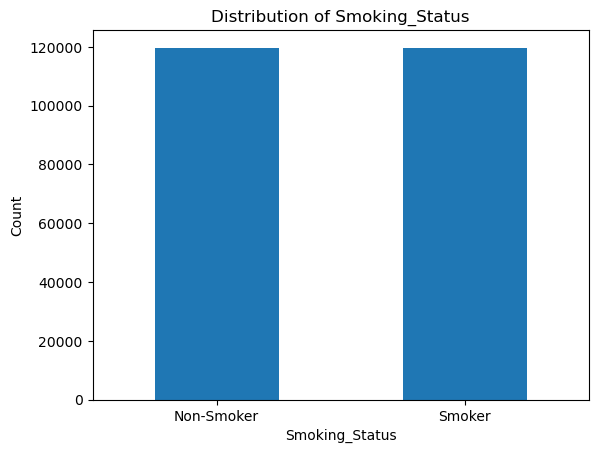

In [141]:
plt.figure()
df['Smoking_Status'].value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Smoking_Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking_Status')
plt.show()

In [39]:
df['Smoking_Status'].value_counts(normalize=True) * 100

Smoking_Status
Non-Smoker    50.026748
Smoker        49.973252
Name: proportion, dtype: float64

- Smoking Status is a binary categorical variable with an almost equal distribution between smokers (≈49.9%) and non-smokers (≈50.1%). This indicates a well-balanced feature with no class imbalance.

In [41]:
df['Hypertension'].value_counts()

Hypertension
No     174557
Yes     64709
Name: count, dtype: int64

In [42]:
df['Hypertension'].value_counts(normalize=True) * 100

Hypertension
No     72.955205
Yes    27.044795
Name: proportion, dtype: float64

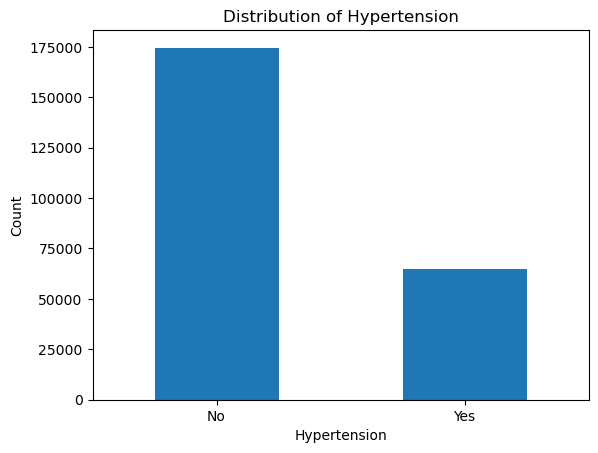

In [143]:
plt.figure()
df['Hypertension'].value_counts().plot(kind='bar', rot= 0)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Distribution of Hypertension')
plt.show()

- Hypertension is a binary categorical variable with a higher proportion of non-hypertensive individuals (~ 73%) compared to hypertensive individuals (~27%).

In [45]:
df['Diabetes'].value_counts(normalize=True) * 100

Diabetes
No     88.936163
Yes    11.063837
Name: proportion, dtype: float64

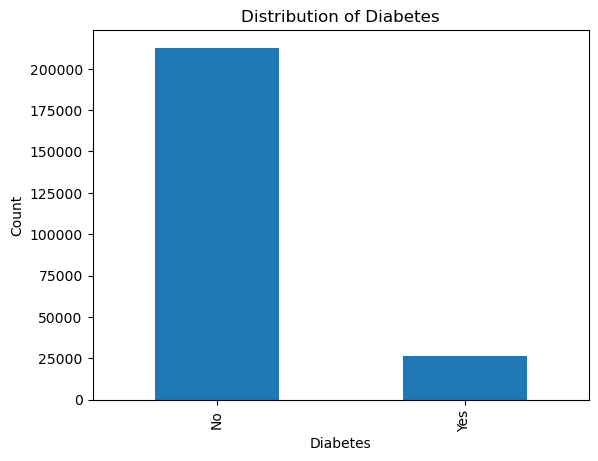

In [46]:
plt.figure()
df['Diabetes'].value_counts().plot(kind = 'bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')
plt.show()

In [47]:
df['Obesity'].value_counts(normalize=True) * 100

Obesity
No     70.014544
Yes    29.985456
Name: proportion, dtype: float64

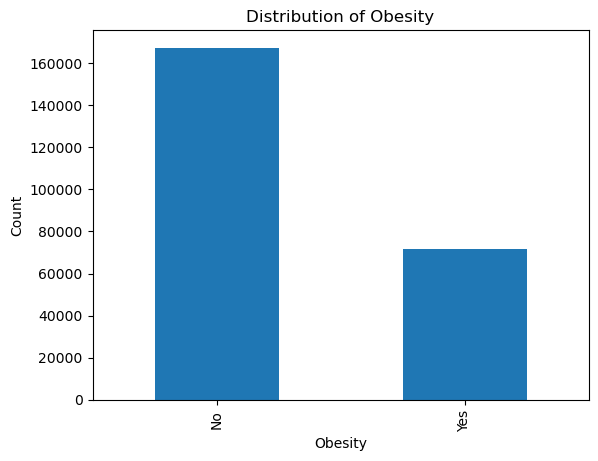

In [48]:
plt.figure()
df['Obesity'].value_counts().plot(kind = 'bar')
plt.xlabel('Obesity')
plt.ylabel('Count')
plt.title('Distribution of Obesity')
plt.show()

- Obesity variable shows moderate class imbalance with ~30% of individuals classified as obese. This proportion is substantial and may play an important role in cardiovascular risk analysis.


In [50]:
df['Family_History_CVD'].value_counts(normalize=True) * 100

Family_History_CVD
No     75.121413
Yes    24.878587
Name: proportion, dtype: float64

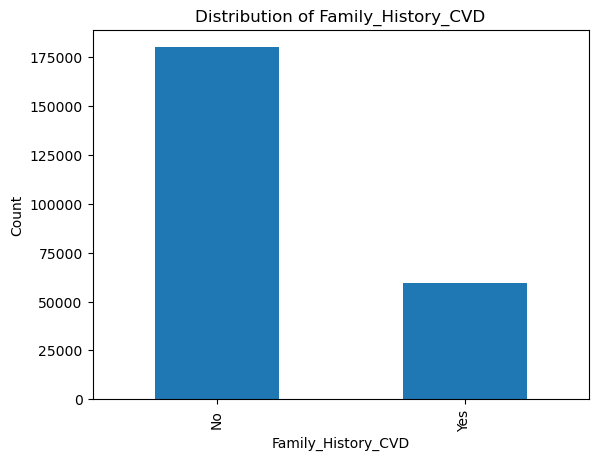

In [51]:
plt.figure()
df['Family_History_CVD'].value_counts().plot(kind = 'bar')
plt.xlabel('Family_History_CVD')
plt.ylabel('Count')
plt.title('Distribution of Family_History_CVD')
plt.show()

In [52]:
df['TCM_Use'].value_counts(normalize=True) * 100

TCM_Use
No     60.162748
Yes    39.837252
Name: proportion, dtype: float64

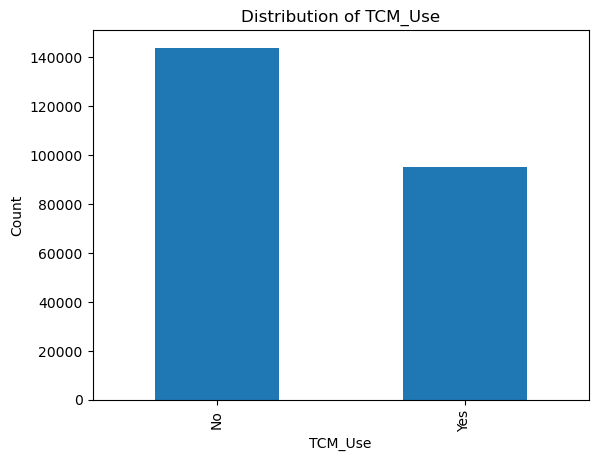

In [53]:
plt.figure()
df['TCM_Use'].value_counts().plot(kind = 'bar')
plt.xlabel('TCM_Use')
plt.ylabel('Count')
plt.title('Distribution of TCM_Use')
plt.show()

In [54]:
df['Chronic_Kidney_Disease'].value_counts(normalize=True) * 100

Chronic_Kidney_Disease
No     85.092324
Yes    14.907676
Name: proportion, dtype: float64

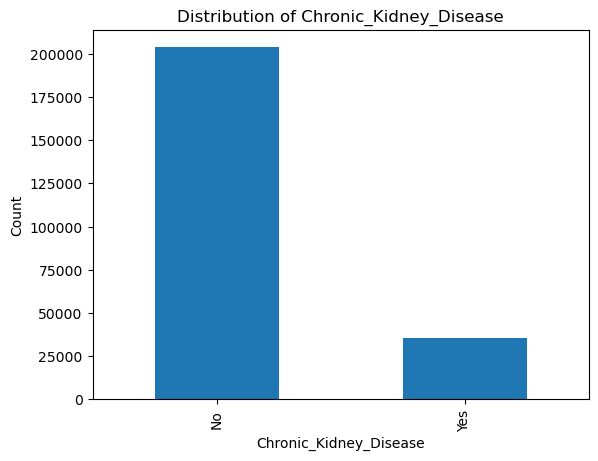

In [55]:
plt.figure()
df['Chronic_Kidney_Disease'].value_counts().plot(kind = 'bar')
plt.xlabel('Chronic_Kidney_Disease')
plt.ylabel('Count')
plt.title('Distribution of Chronic_Kidney_Disease')
plt.show()

In [56]:
df['Previous_Heart_Attack'].value_counts(normalize=True) * 100

Previous_Heart_Attack
No     89.986041
Yes    10.013959
Name: proportion, dtype: float64

In [58]:
df['Rural_or_Urban'].value_counts(normalize=True) * 100

Rural_or_Urban
Rural    59.978016
Urban    40.021984
Name: proportion, dtype: float64

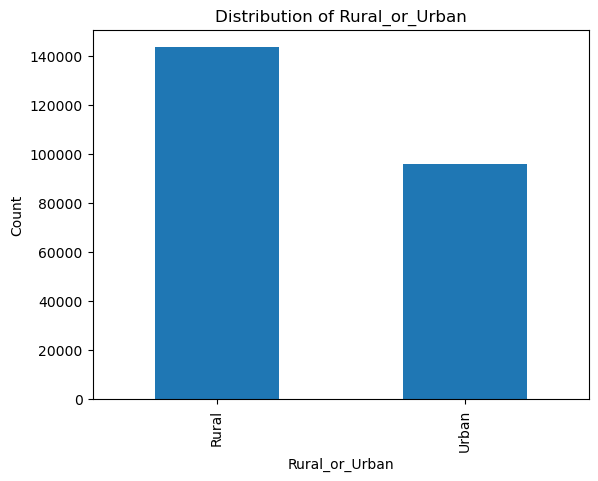

In [59]:
plt.figure()
df['Rural_or_Urban'].value_counts().plot(kind = 'bar')
plt.xlabel('Rural_or_Urban')
plt.ylabel('Count')
plt.title('Distribution of Rural_or_Urban')
plt.show()

In [60]:
df['Region'].value_counts(normalize=True) * 100

Region
Western     20.103149
Eastern     20.044219
Southern    19.988632
Central     19.933463
Northern    19.930538
Name: proportion, dtype: float64

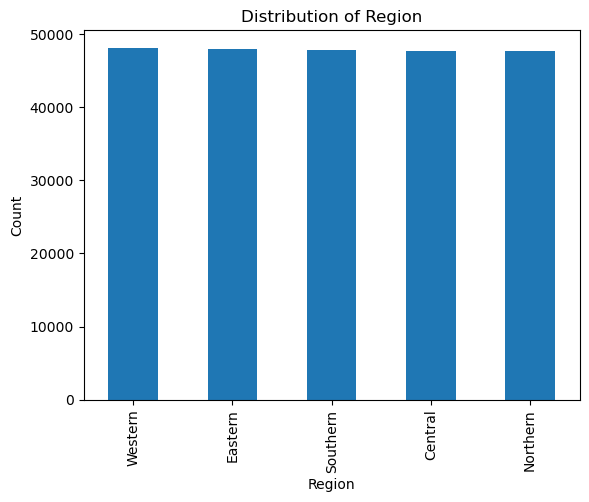

In [61]:
plt.figure()
df['Region'].value_counts().plot(kind = 'bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')
plt.show()

In [145]:
df['Heart_Attack'].value_counts(normalize=True) * 100

Heart_Attack
No     87.849924
Yes    12.150076
Name: proportion, dtype: float64

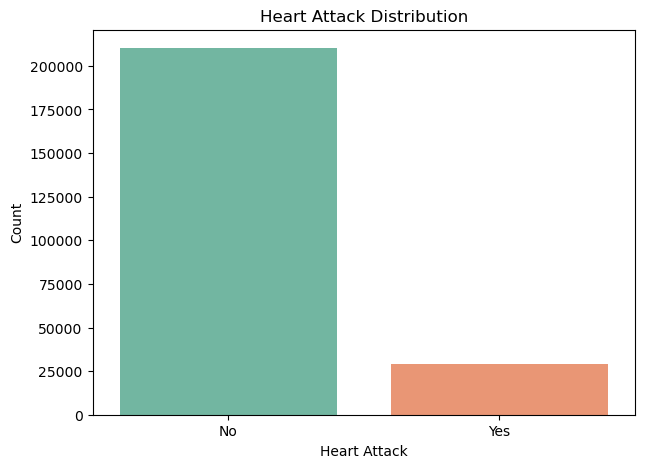

In [155]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'Heart_Attack', palette='Set2', hue = 'Heart_Attack')
plt.title('Heart Attack Distribution')
plt.xlabel("Heart Attack")
plt.ylabel("Count")
plt.show()

In [64]:
df['Province'].value_counts(normalize=True) * 100

Province
Guangdong    12.606054
Beijing      12.565095
Shandong     12.548795
Shanghai     12.509926
Qinghai      12.503657
Sichuan      12.475655
Henan        12.440965
Gansu        12.349853
Name: proportion, dtype: float64

In [66]:
df['Employment_Status'].value_counts(normalize=True) * 100

Employment_Status
Retired       33.382094
Unemployed    33.333612
Employed      33.284294
Name: proportion, dtype: float64

- Ordinal Univariate
- Education_Level        (Primary < Secondary < Higher)
Income_Level           (Low < Middle < High)
Diet_Score             (Poor < Moderate < Healthy)
Stress_Level           (Low < Medium < High)
Physical_Activity      (Low < Medium < High)
Air_Pollution_Exposure (Low < Medium < High)
Healthcare_Access      (Poor < Moderate < Good)
Hospital_Availability  (Low < Medium < High)
Cholesterol_Level      (Low < Normal < High)
Alcohol_Consumption    (Low < Medium < High)

In [133]:
df['Education_Level'].value_counts(normalize=True) * 100

Education_Level
Higher       33.366175
Primary      33.343353
Secondary    33.290472
Name: proportion, dtype: float64

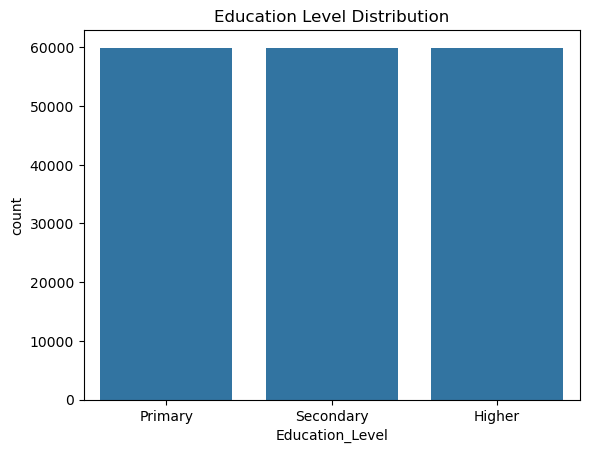

In [139]:
order = ['Primary', 'Secondary', 'Higher']
sns.countplot(data = df , x = 'Education_Level',order= order)
plt.title('Education Level Distribution')
plt.show()

In [69]:
df['Cholesterol_Level'].value_counts(normalize=True) * 100

Cholesterol_Level
Normal    33.473623
High      33.276771
Low       33.249605
Name: proportion, dtype: float64

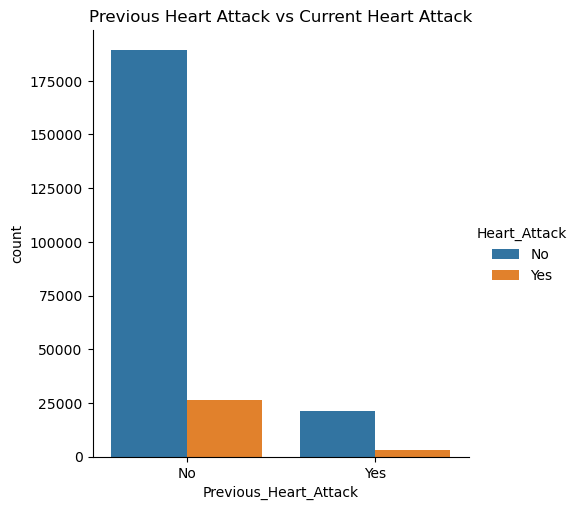

In [173]:
pd.crosstab(df['Heart_Attack'], df['Previous_Heart_Attack'], normalize='index')*100
sns.catplot( x = 'Previous_Heart_Attack', hue = 'Heart_Attack', kind = 'count', data = df)
plt.title("Previous Heart Attack vs Current Heart Attack")
plt.show()

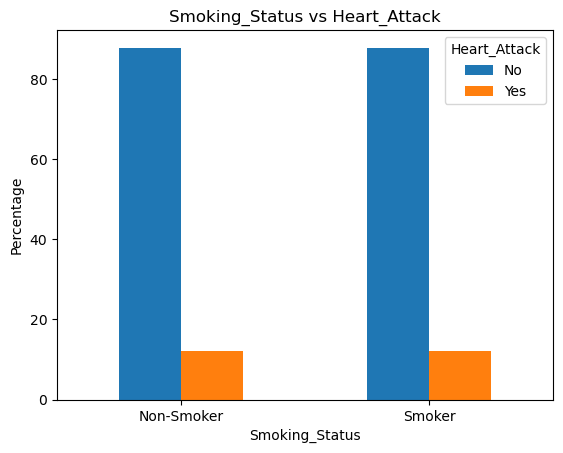

In [210]:
(pd.crosstab(df['Smoking_Status'], df['Heart_Attack'], normalize='index')*100).plot(kind='bar', rot=0)
plt.ylabel("Percentage")
plt.title('Smoking_Status vs Heart_Attack')
plt.show()

- Smokers show a slightly higher heart attack percentage compared to non-smokers.

- Smoking is a relevant lifestyle risk factor and should be retained for further modeling.

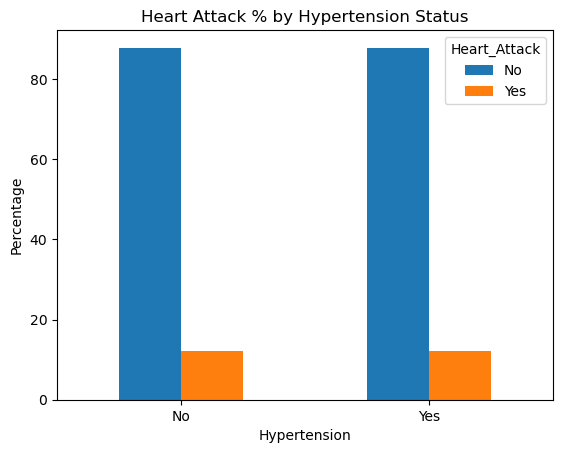

In [187]:
(pd.crosstab(df['Hypertension'], df['Heart_Attack'], normalize='index')*100).plot(kind = 'bar', rot = 0)
plt.title("Heart Attack % by Hypertension Status")
plt.ylabel("Percentage")
plt.legend(title='Heart_Attack')
plt.show()

- The proportion of heart attack cases is nearly similar for individuals with and without hypertension.

- Hypertension alone does not show a strong standalone association with heart attack in this dataset.

- This suggests that hypertension may contribute to heart attack risk in combination with other factors such as age, blood pressure level, diabetes, or overall CVD risk score.

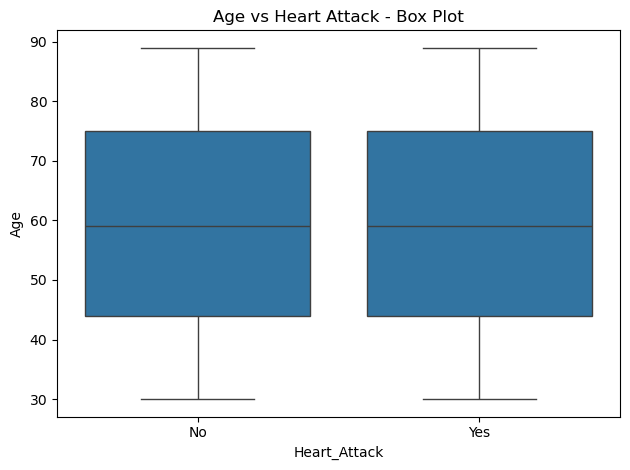

In [193]:
sns.boxplot(x='Heart_Attack', y='Age', data=df)
plt.title("Age vs Heart Attack - Box Plot")

plt.tight_layout()
plt.show()

- The box plot shows similar median ages for individuals with and without heart attack (~60 years).

- The age spread (IQR) is comparable across both groups, suggesting no strong separation based on age alone.

- Presence of heart attack cases at younger ages indicates age is not a sufficient standalone risk factor.

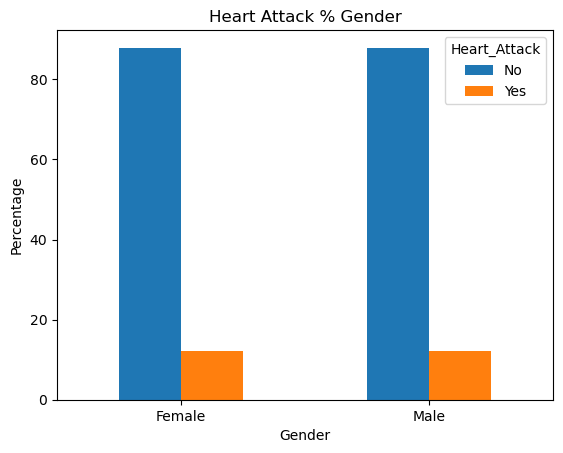

In [202]:
(pd.crosstab(df['Gender'], df['Heart_Attack'], normalize='index') * 100).plot(kind = 'bar', rot = 0)
plt.title("Heart Attack % Gender")
plt.ylabel("Percentage")
plt.legend(title='Heart_Attack')
plt.show()

- Heart attack prevalence is nearly equal across genders.

- Both males and females show ~12–13% heart attack cases.

- Gender alone does not appear to be a strong differentiating factor for heart attack risk in this dataset.


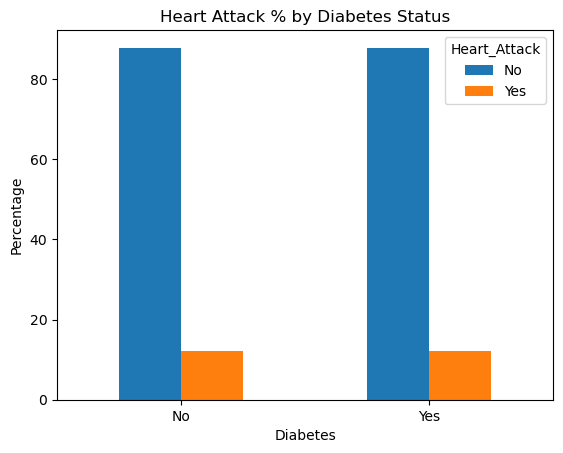

In [206]:
(pd.crosstab(df['Diabetes'], df['Heart_Attack'], normalize='index') * 100)\
.plot(kind='bar', rot=0)

plt.title("Heart Attack % by Diabetes Status")
plt.ylabel("Percentage")
plt.legend(title="Heart_Attack")
plt.show()

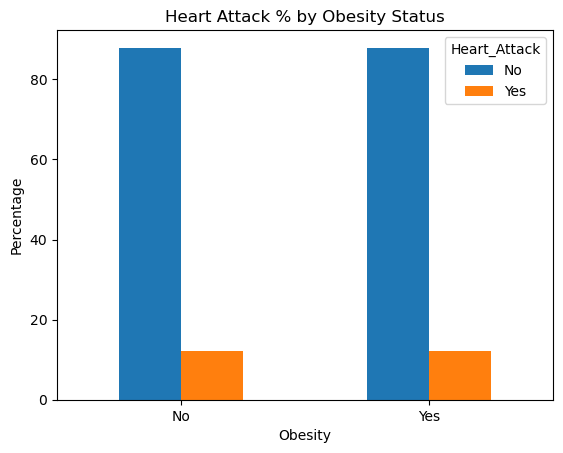

In [226]:
(pd.crosstab(df['Obesity'], df['Heart_Attack'], normalize='index') * 100)\
.plot(kind='bar', rot=0)

plt.title("Heart Attack % by Obesity Status")
plt.ylabel("Percentage")
plt.legend(title="Heart_Attack")
plt.show()

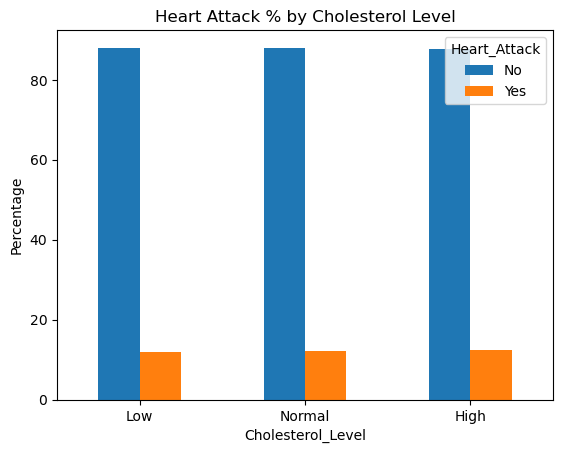

In [220]:

(pd.crosstab(df['Cholesterol_Level'], df['Heart_Attack'], normalize='index') * 100)\
.plot(kind='bar', rot=0)

plt.title("Heart Attack % by Cholesterol Level")
plt.ylabel("Percentage")
plt.legend(title="Heart_Attack")
plt.show()

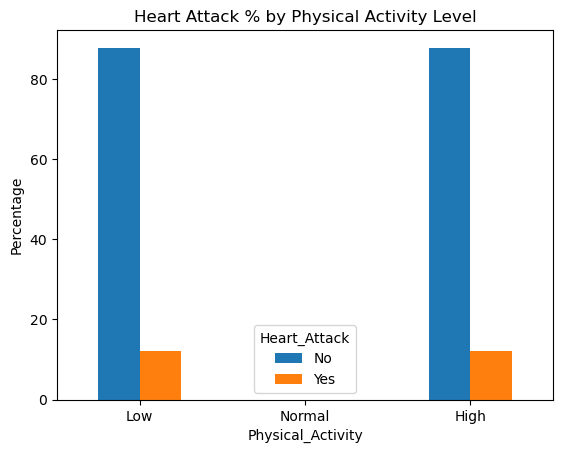

In [224]:
order = ['Low', 'Normal', 'High']
ct = pd.crosstab(df['Physical_Activity'], df['Heart_Attack'], normalize='index') * 100
ct.reindex(order).plot(kind='bar', rot=0)

plt.title("Heart Attack % by Physical Activity Level")
plt.ylabel("Percentage")
plt.legend(title="Heart_Attack")
plt.show()

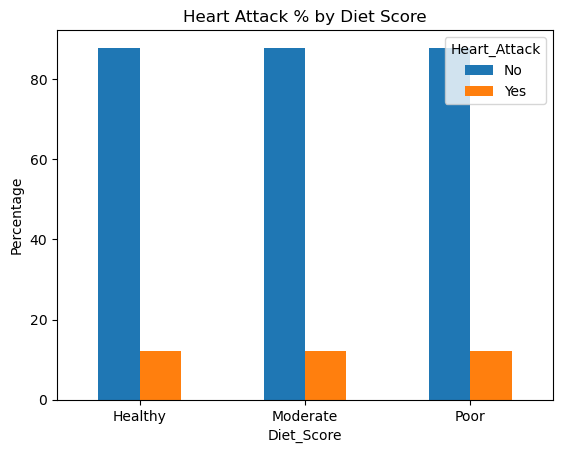

In [236]:
(pd.crosstab(df['Diet_Score'], df['Heart_Attack'], normalize='index') * 100)\
.plot(kind='bar', rot=0)

plt.title("Heart Attack % by Diet Score")
plt.ylabel("Percentage")
plt.legend(title="Heart_Attack")
plt.show()

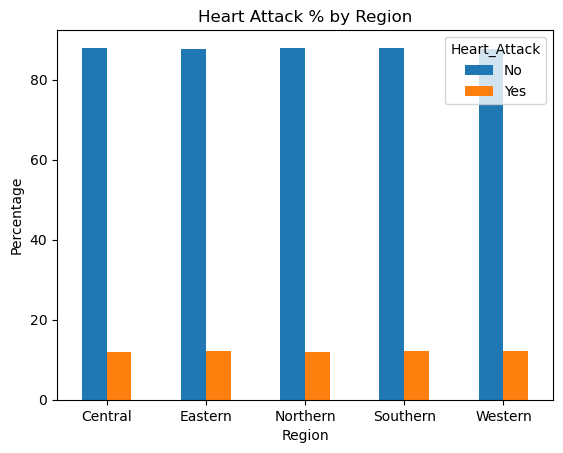

In [238]:
(pd.crosstab(df['Region'], df['Heart_Attack'], normalize='index') * 100)\
.plot(kind='bar', rot=0)

plt.title("Heart Attack % by Region")
plt.ylabel("Percentage")
plt.legend(title="Heart_Attack")
plt.show()

In [244]:
summary = []

for col in categorical_vars:
    temp = pd.crosstab(df[col], df['Heart_Attack'], normalize='index') * 100
    temp = temp.reset_index()
    temp['Variable'] = col
    temp = temp.rename(columns={
        col: 'Category',
        'Yes': 'Heart_Attack_%'
    })
    summary.append(temp[['Variable', 'Category', 'Heart_Attack_%']])

summary_df = pd.concat(summary, ignore_index=True)
summary_df

Heart_Attack,Variable,Category,Heart_Attack_%
0,Gender,Female,12.191950
1,Gender,Male,12.107980
2,Hypertension,No,12.135291
3,Hypertension,Yes,12.189958
4,Diabetes,No,12.149779
5,Diabetes,Yes,12.152463
6,Smoking_Status,Non-Smoker,12.195794
7,Smoking_Status,Smoker,12.104308
8,Obesity,No,12.098185
9,Obesity,Yes,12.271238


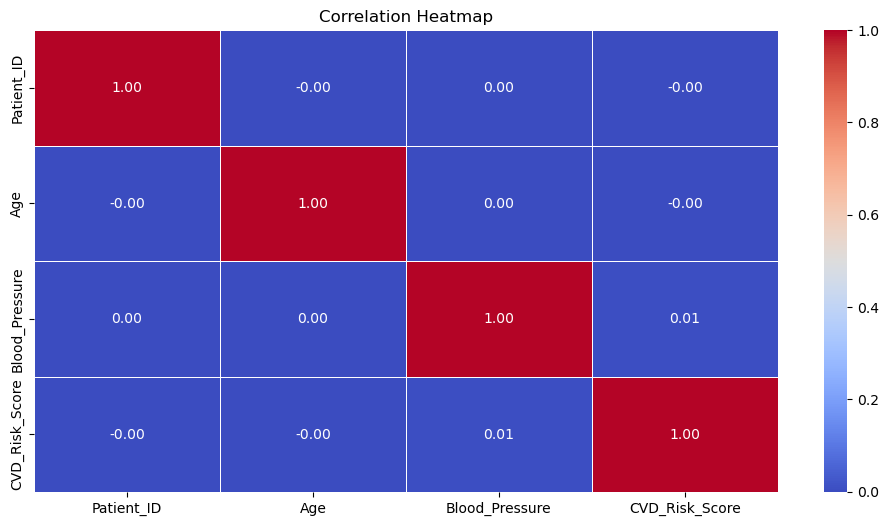

In [242]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()